In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


In [4]:
df = pd.read_csv('../resources/data/initial_users_data_lucianobajr.csv', encoding='utf-8')

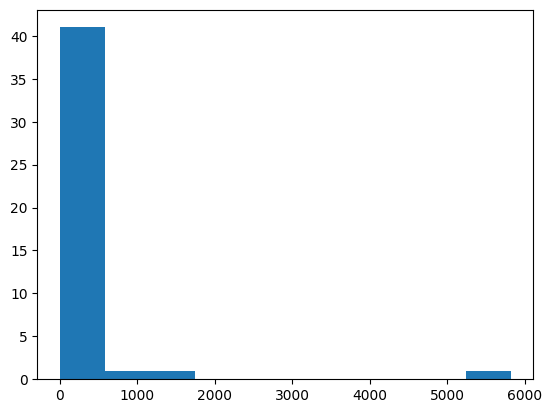

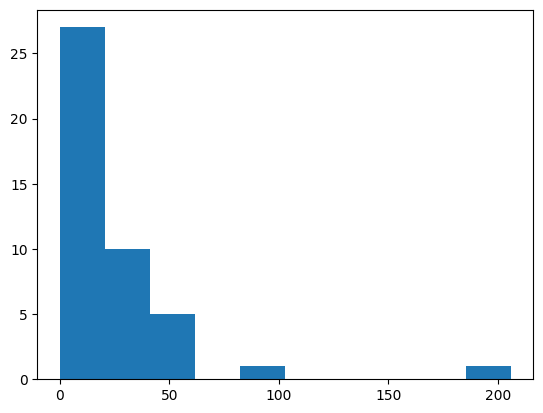

In [3]:
# Identificar diferenças entre os usuários
# Comparar os usuários com mais seguidores com os usuários com menos seguidores
df_high_followers = df[df["Followers"] > df["Followers"].mean()]
df_low_followers = df[df["Followers"] < df["Followers"].mean()]

# Analisar a centralidade
# Construir o grafo de rede complexa
G = nx.Graph()
for i in range(len(df)):
    for j in range(len(df)):
        if df.loc[i, "Following"] == df.loc[j, "Nome de usuário"]:
            G.add_edge(df.loc[i, "Nome de usuário"], df.loc[j, "Nome de usuário"])

# Calcular a centralidade de grau
degree_centrality = nx.degree_centrality(G)

# Analisar a distribuição dos dados
# Visualizar a distribuição do número de seguidores
plt.hist(df["Followers"])
plt.show()

# Visualizar a distribuição do número de repositórios públicos
plt.hist(df["PublicRepos"])
plt.show()

(44, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nome de usuário    44 non-null     object 
 1   ID                 44 non-null     int64  
 2   AvatarURL          44 non-null     object 
 3   GravatarID         0 non-null      float64
 4   URL                44 non-null     object 
 5   HTMLURL            44 non-null     object 
 6   FollowersURL       44 non-null     object 
 7   FollowingURL       44 non-null     object 
 8   GistsURL           44 non-null     object 
 9   StarredURL         44 non-null     object 
 10  SubscriptionsURL   44 non-null     object 
 11  OrganizationsURL   44 non-null     object 
 12  ReposURL           44 non-null     object 
 13  EventsURL          44 non-null     object 
 14  ReceivedEventsURL  44 non-null     object 
 15  Type               44 non-null     object 
 16  SiteAdmin          

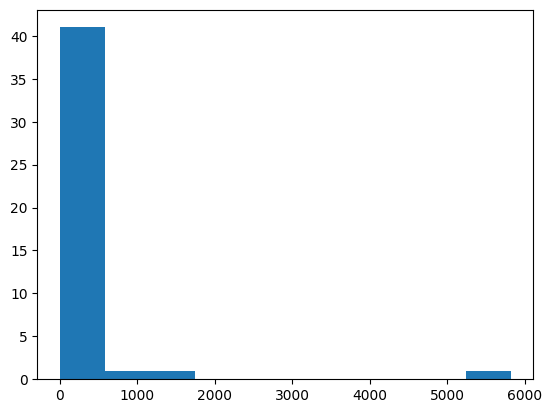

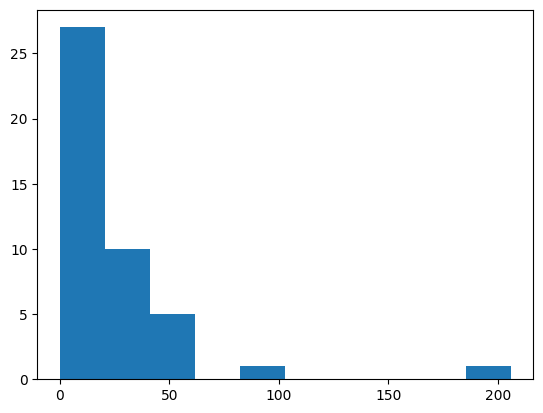

A média de seguidores é de 199.9318181818182
O usuário com mais seguidores é 5823
O usuário com menos seguidores é 2
A média de repositórios públicos é de 24.863636363636363
O usuário com mais repositórios públicos é 206
O usuário com menos repositórios públicos é 0


In [4]:

# Informações gerais
print(df.shape)
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Visualizações
plt.hist(df["Followers"])
plt.show()

plt.hist(df["PublicRepos"])
plt.show()

# Insights
print("A média de seguidores é de", df["Followers"].mean())
print("O usuário com mais seguidores é", df["Followers"].max())
print("O usuário com menos seguidores é", df["Followers"].min())

print("A média de repositórios públicos é de", df["PublicRepos"].mean())
print("O usuário com mais repositórios públicos é", df["PublicRepos"].max())
print("O usuário com menos repositórios públicos é", df["PublicRepos"].min())

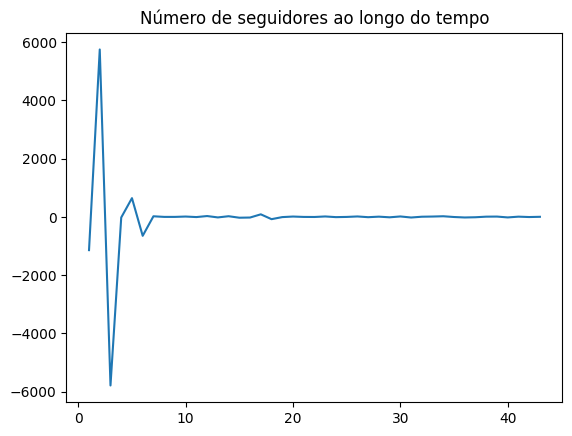

In [5]:
# Calcular o número de seguidores ao longo do tempo
df["FollowersOverTime"] = df["Followers"].diff()

# Visualizar o número de seguidores ao longo do tempo
plt.plot(df["FollowersOverTime"])
plt.title("Número de seguidores ao longo do tempo")
plt.show()

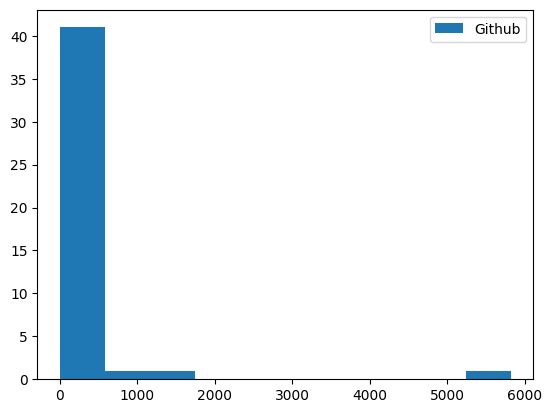

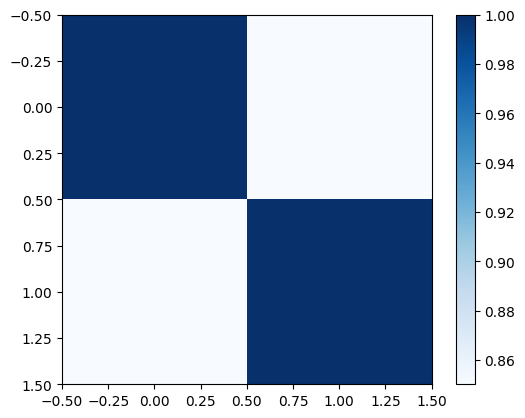

In [5]:

# Selecionar as colunas a serem usadas
df = df[["Followers", "PublicRepos"]]

# Normalizar os dados
df["Followers"] = df["Followers"] / df["Followers"].max()
df["PublicRepos"] = df["PublicRepos"] / df["PublicRepos"].max()

# Criar o gráfico de calor
plt.imshow(df.corr(), cmap="Blues")
plt.colorbar()
plt.show()

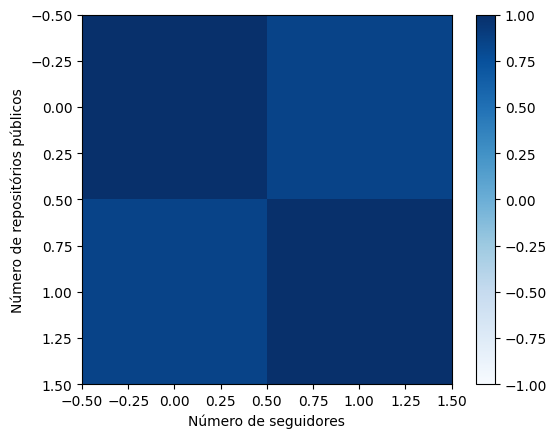

In [6]:

# Selecionar as colunas a serem usadas
df = df[["Followers", "PublicRepos"]]

# Normalizar os dados
df["Followers"] = df["Followers"] / df["Followers"].max()
df["PublicRepos"] = df["PublicRepos"] / df["PublicRepos"].max()

# Criar o gráfico de calor
plt.imshow(df.corr(), cmap="Blues", vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel("Número de seguidores")
plt.ylabel("Número de repositórios públicos")
plt.show()